# Color Detection Using ML

## Importing libraries :

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

import os
os.chdir('D:\Spark datasets\Color-Identification-using-Machine-Learning-master')
%matplotlib inline

## Loading Data

The type of this input is <class 'numpy.ndarray'>
Shape: (1024, 1280, 3)


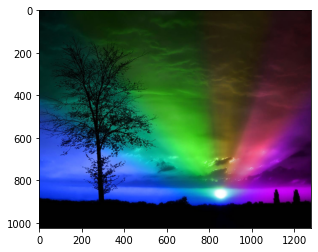

In [2]:
image = cv2.imread('sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### Changing colouer from BGR to RGB

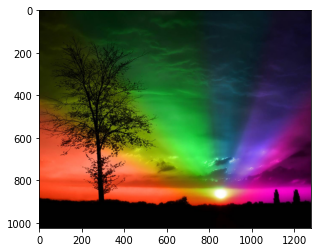

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Changing colouer from RGB to Grayscale

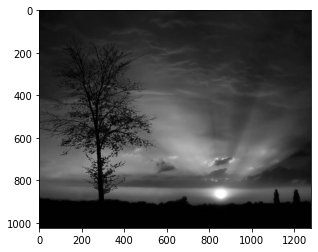

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

### Resizing the image

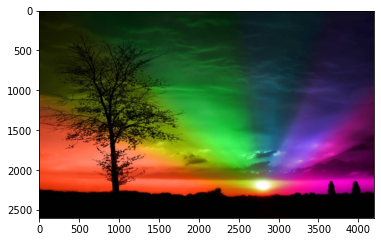

In [5]:
resized_image = cv2.resize(image, (4200, 2600))
plt.imshow(resized_image)

# Color Identification :

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### Applying the KMeans to first fit and then predicting on the image to get the results

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([235.8913938 , 103.57524707,  52.78194352]),
 array([22.76666005, 37.06443293, 25.79628481]),
 array([ 67.67977741, 193.96224864,  60.31288732]),
 array([172.54959827,  52.93665019, 179.49219716]),
 array([76.18397597, 29.89599645, 97.60658886]),
 array([4.790041  , 3.79134425, 1.62254622]),
 array([117.55586546,  98.57642877,  15.79939841]),
 array([28.18093778, 97.22977116, 60.17327251])]

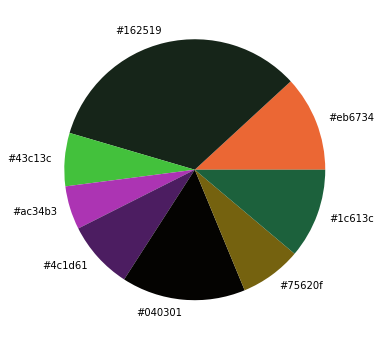

In [9]:
get_colors(get_image('sample_image.jpg'), 8, True)

# Searching image's using Color's

In [10]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'RED': [128, 0, 0],
    'YELLOW': [255, 255, 0],
    'WHITE': [255, 255, 255],
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

### Viewing All images 

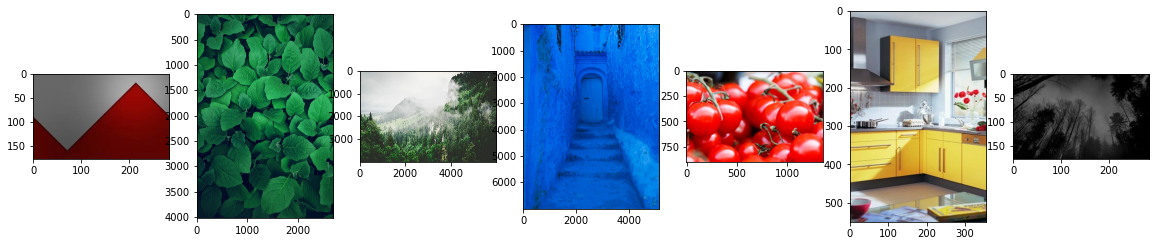

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

### Matching with the top 10 colors of the image.

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

### Calling the above method for all the images to match our selected colors.

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 7, index)
            plt.imshow(images[i])
            index += 1

## Searching for WHITE :

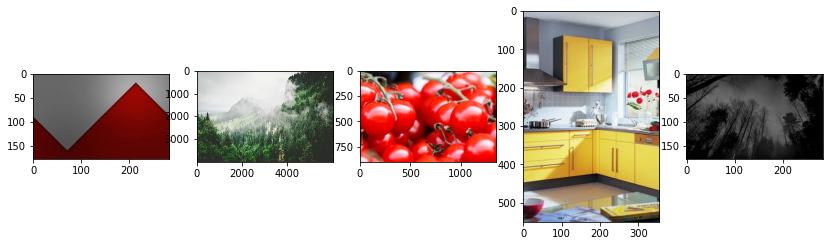

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['WHITE'], 60, 7)

## Searching for RED :

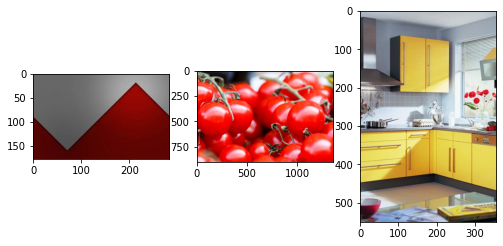

In [15]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 7)

## Searching for YELLOW :

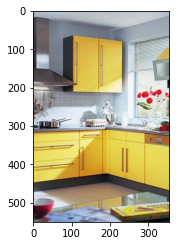

In [16]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 7)

# Searching for GREEN : 

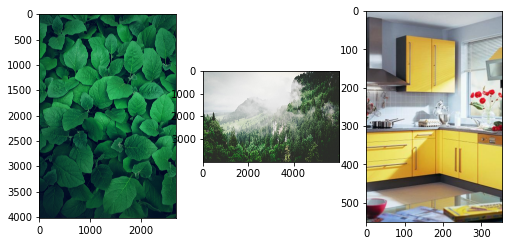

In [17]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 7)

## Searching for BLUE :

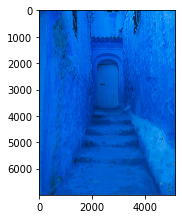

In [18]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 7)


# Conclusion :

### In this, we used KMeans to extract colors from images and then used the RGB Values of Colors to identify images from a collection that have similar color's in them.